### Task 1. Color Inversion for the picture.

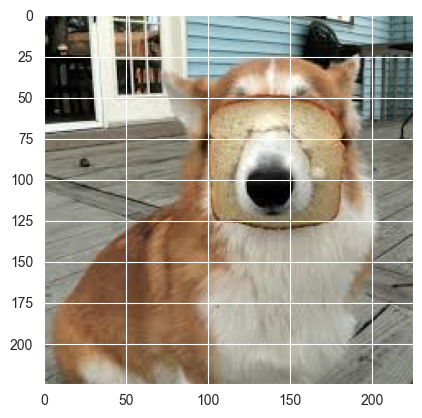

In [1]:
import matplotlib.pyplot as plt


img = plt.imread('img.jpg')
plt.imshow(img)

In [2]:
img.shape

(225, 225, 3)

In [3]:
inverted_img = img.copy()

inverted_img

array([[[135, 145, 157],
        [129, 137, 148],
        [ 73,  80,  90],
        ...,
        [ 69, 100,  95],
        [ 68, 100,  95],
        [ 77, 109, 108]],

       [[112, 122, 134],
        [133, 141, 152],
        [ 92,  99, 109],
        ...,
        [ 99, 130, 125],
        [ 99, 131, 128],
        [ 98, 130, 129]],

       [[ 70,  78,  89],
        [100, 109, 118],
        [ 83,  90,  98],
        ...,
        [104, 134, 132],
        [103, 135, 132],
        [100, 132, 131]],

       ...,

       [[ 98,  91,  83],
        [ 77,  73,  64],
        [ 76,  73,  66],
        ...,
        [123, 126, 117],
        [129, 132, 123],
        [111, 114, 105]],

       [[112, 108,  99],
        [126, 123, 114],
        [130, 130, 122],
        ...,
        [128, 131, 120],
        [127, 130, 119],
        [ 82,  85,  76]],

       [[131, 131, 119],
        [134, 134, 124],
        [118, 119, 111],
        ...,
        [119, 121, 108],
        [ 98, 100,  87],
        [ 36,  38,  27]]

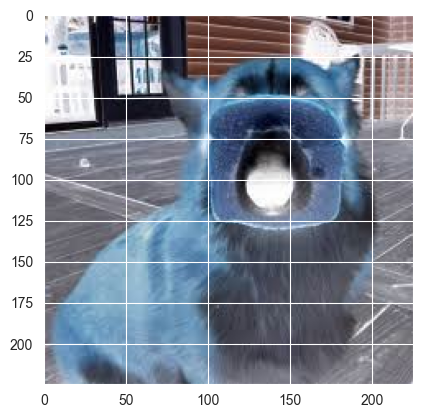

In [4]:
for i in range(inverted_img.shape[0]):
    for j in range(inverted_img.shape[1]):
        for k in range(inverted_img.shape[2]):
            inverted_img[i, j, k] = 255 - inverted_img[i, j, k]
            
plt.imshow(inverted_img)

### Task 2. Titanic dataset investigation

##### Creating dataframe with basic data profiling using describe and info.

In [5]:
import pandas as pd


main_df = pd.read_csv('./titanic_dataset/train.csv')
main_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
main_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Validating survived ratio by sex.

In [8]:
survived_df = main_df[main_df.Survived == 1]

survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [9]:
survived_df.groupby('Sex')['PassengerId'].count().reset_index(name='Count_Survived')

,Sex,Count_Survived
0,female,233
1,male,109


In [10]:
survival_ratio = round(len(survived_df) * 100 / len(main_df), 2)

survival_ratio

38.38

In [11]:
survived_df.groupby(['Sex', 'Pclass', 'Embarked'])['PassengerId'].count().reset_index(name='Count_Survived')

,Sex,Pclass,Embarked,Count_Survived
0,female,1,C,42
1,female,1,Q,1
2,female,1,S,46
3,female,2,C,7
4,female,2,Q,2
5,female,2,S,61
6,female,3,C,15
7,female,3,Q,24
8,female,3,S,33
9,male,1,C,17


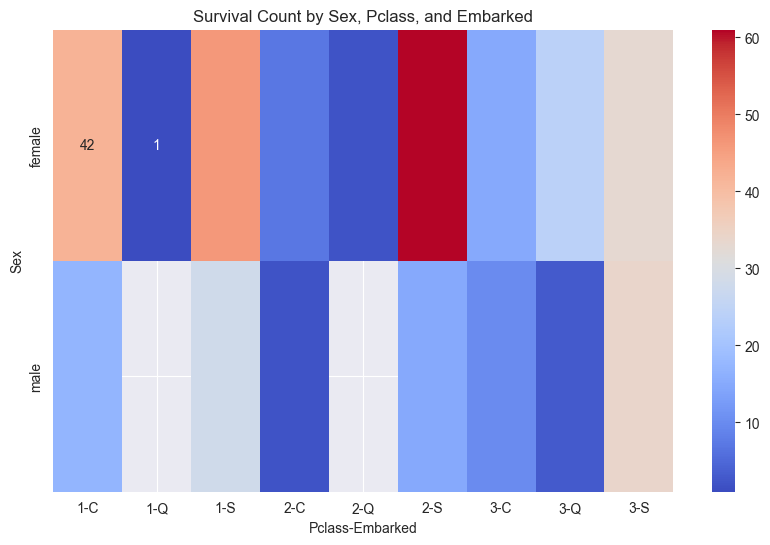

In [12]:
import seaborn as sns


pivot_table = survived_df.pivot_table(index='Sex', columns=['Pclass', 'Embarked'], values='PassengerId', aggfunc='count')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')

plt.title('Survival Count by Sex, Pclass, and Embarked')

plt.show()

##### Ticket cost investigation by port. Investigating avg, min, max.

In [13]:
main_df.groupby(['Pclass', 'Embarked'])['Fare'].min().reset_index(name='Min Ticket Cost by Class and Port')

,Pclass,Embarked,Min Ticket Cost by Class and Port
0,1,C,26.5500
1,1,Q,90.0000
2,1,S,0.0000
3,2,C,12.0000
4,2,Q,12.3500
5,2,S,0.0000
6,3,C,4.0125
7,3,Q,6.7500
8,3,S,0.0000


In [14]:
main_df.groupby(['Pclass', 'Embarked'])['Fare'].mean().reset_index(name='Avg Ticket Cost by Class and Port')

,Pclass,Embarked,Avg Ticket Cost by Class and Port
0,1,C,104.718529
1,1,Q,90.000000
2,1,S,70.364862
3,2,C,25.358335
4,2,Q,12.350000
5,2,S,20.327439
6,3,C,11.214083
7,3,Q,11.183393
8,3,S,14.644083


In [15]:
main_df.groupby(['Pclass', 'Embarked'])['Fare'].max().reset_index(name='Max Ticket Cost by Class and Port')

,Pclass,Embarked,Max Ticket Cost by Class and Port
0,1,C,512.3292
1,1,Q,90.0000
2,1,S,263.0000
3,2,C,41.5792
4,2,Q,12.3500
5,2,S,73.5000
6,3,C,22.3583
7,3,Q,29.1250
8,3,S,69.5500


##### Value distribution

In [16]:
main_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
main_df['Embarked'].value_counts(normalize=True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

In [18]:
survived_df['Embarked'].value_counts()

Embarked
S    217
C     93
Q     30
Name: count, dtype: int64

In [19]:
survived_df['Embarked'].value_counts(normalize=True)

Embarked
S    0.638235
C    0.273529
Q    0.088235
Name: proportion, dtype: float64

##### Duplicates check

In [20]:
main_df.size > main_df.drop_duplicates().size

False

##### Siblings/Parents couples search

In [21]:
def extract_last_name(name: str) -> str:
    """
    Current function is used to receive only last names.
    :param name: full name to be truncated.
    :return: only last name.
    """
    return name.split(',')[0].strip()

In [22]:
main_df['LastName'] = main_df['Name'].apply(extract_last_name)

main_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr


In [23]:
siblings_spouses_df = main_df[main_df['SibSp'] > 0]

siblings_spouses_df.groupby(['LastName', 'Sex', 'Age', 'Ticket', 'Pclass']).size().reset_index(name='Count Siblings')

,LastName,Sex,Age,Ticket,Pclass,Count Siblings
0,Abbott,female,35.0,C.A. 2673,3,1
1,Abbott,male,16.0,C.A. 2673,3,1
2,Abelson,female,28.0,P/PP 3381,2,1
3,Abelson,male,30.0,P/PP 3381,2,1
4,Ahlin,female,40.0,7546,3,1
...,...,...,...,...,...,...
237,Yasbeck,female,15.0,2659,3,1
238,Yasbeck,male,27.0,2659,3,1
239,Zabour,female,14.5,2665,3,1
240,de Messemaeker,female,36.0,345572,3,1


In [24]:
parents_children_df = main_df[main_df['Parch'] > 0]

parents_children_df.groupby(['LastName', 'Sex', 'Age', 'Ticket', 'Pclass']).size().reset_index(name='Count Parent Children')

,LastName,Sex,Age,Ticket,Pclass,Count Parent Children
0,Abbott,female,35.0,C.A. 2673,3,1
1,Abbott,male,16.0,C.A. 2673,3,1
2,Aks,female,18.0,392091,3,1
3,Allison,female,2.0,113781,1,1
4,Allison,female,25.0,113781,1,1
...,...,...,...,...,...,...
187,Wick,female,31.0,36928,1,1
188,Wick,female,45.0,36928,1,1
189,Widener,male,27.0,113503,1,1
190,Williams,male,51.0,PC 17597,1,1
